In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from statistics import NormalDist
from scipy.stats import ttest_1samp
from scipy import stats

# Paired t - test 대응 t 검정
- 절차
  + 정규성 검정
  + 등분산성 검정 X : 같은 집단에 대한 전 후 차이니까 분산 같은지 확인할 필요 없음.

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

exam1_scores = np.random.uniform(50, 100, 20)
exam2_scores = exam1_scores + np.random.normal(0, 10, 20)

df = pd.DataFrame({
    'Student_ID': range(1, 21),
    'Exam1_Score': exam1_scores,
    'Exam2_Score': exam2_scores
})

df['Exam1_Score'] = df['Exam1_Score'].astype('int64')
df['Exam2_Score'] = df['Exam2_Score'].astype('int64')
df['diff'] = df['Exam2_Score'] - df['Exam1_Score']

df.head(1)

,Student_ID,Exam1_Score,Exam2_Score,diff
0,1,68,58,-10


In [3]:
df.shape

(20, 4)

In [4]:
# sample 이 20개니까 무조건 정규성 검정 해야함

## 샤피로 윌크 검정 ( 정규성 검정 )

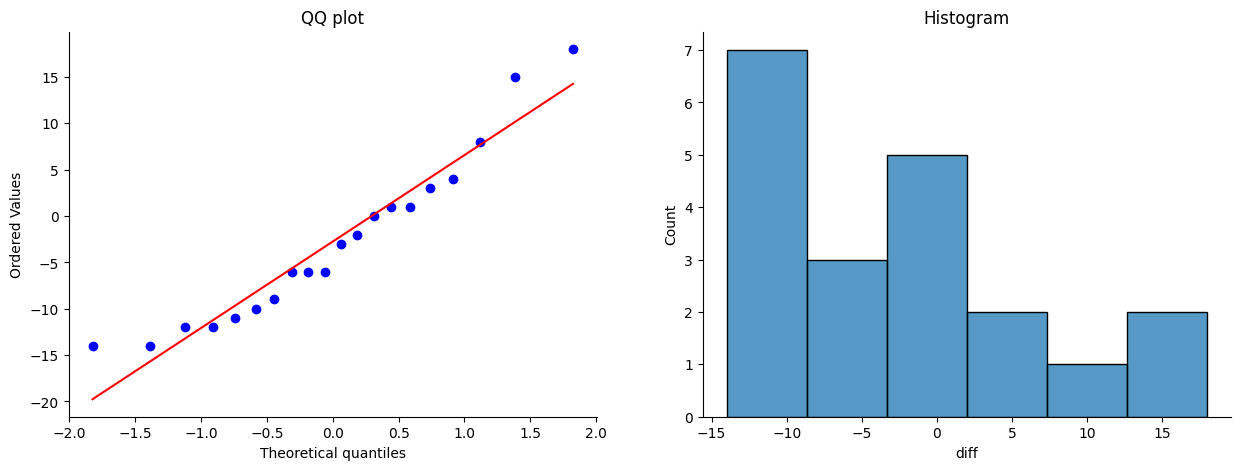

ShapiroResult(statistic=np.float64(0.9267928086509175), pvalue=np.float64(0.13394043618879037))

In [7]:
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = df['diff']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

In [8]:
# pvalue=0.13394043618879037) : 0.05 보다 크니까, 귀무가설 채택

## 가설 검정 t-test

In [9]:
from scipy import stats

t, p = stats.ttest_rel(df['Exam2_Score'] , df['Exam1_Score'])
t, p

(np.float64(-1.343652804294727), np.float64(0.19488870621876497))

In [10]:
# p = 0.19488870621876497 > 0.05 -> 귀무가설 채택

# 분산분석 ANOVA ( Analysis of Variance )
- 그룹 간 평균 차이를 '분산'이라고 한다.
- 각각 그룹 안에서도 분산이 존재하는데, ... 머라고요?

> 종류 5가지
- 그중에 일원 분산분석 One-Way ANOVA 만 한다.
- 5가지를 다 알아야 분산분석 아는 사람임.

 - 1종 오류율 상승 (? 무슨 소리임)

> 깔린 이론
- f 값 해석 (다루진 않지만 알아야 함)

> 분산분석 가설 검정
> - 귀무가설: 세(+) 그룹의 평균에는 차이가 없다
> - 대립가설 : 적어도 하나의 그룹은 다른 그룹간의 평균 차이가 있다.
> - 한계 : f 값은 다름을 알려줄 뿐 구체적 시나리오는 기술 못함
>   + 세 집단이 다 다른지, 두개만 다른지, 모름 !
>   + 그래서 사후 검정을 진행 함 By t-test

In [12]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
# fri는 30개 안넘으니 빼고, 저건 정규성검정해야함. 
# 팁을 무슨 요일 많이 주는 지 보고 싶은 거임
# sat, sun, thur : 세 요일 평균 비교 하고 자 하는 것-> 분산분석 (세 그룹 이상 비교하려면 분산분석)
# sat,sun 에 대해 비교할래 -> t-test (두 그룹 비교할 때는 t-test)

In [16]:
!pip install pingouin -qq
# statsmodel 대신 직관적으로 쓸 수 있는 것

In [17]:
# 분산분석 sample code

In [18]:
import pingouin as pg

# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')

# 등분산성 검정
# 1. This is a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=df, dv='Pain threshold', group='Hair color')


,W,pval,equal_var
levene,0.392743,0.760016,True


In [19]:
# 분산분석
# 2. If the groups have equal variances, we can use a regular one-way ANOVA
pg.anova(data=df, dv='Pain threshold', between='Hair color')


,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,15,6.791407,0.004114,0.575962


In [20]:
# p=0.004114 < 0.05 -> 귀무가설 기각 , 대립가설 채택 -> 사후검정해는 거임

In [21]:
# 사후검정
# 3. If there is a main effect, we can proceed to post-hoc Tukey test
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.074068,1.413596
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.435577,-0.810661
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.414728,0.982361
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.003708,-2.336811
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.789321,-0.626769
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.036647,2.015280


## 연습 | tips data의 tip, day로 분산분석 수행
- 요일별 평균 팁 차이가 있는 지 보자
- 귀무가설: 목요일, 토요일, 일요일 간 평균 팁 차이가 0이다.
- 대립가설: 목요일, 토요일, 일요일 간 평균 팁 차이가 0이 아니다.
- 귀무가설 채택 시 , 사후검정 할 필요 없다
- 귀무가설 기각 -> 대립가설 채택, 사후검정 진행
- 해석은 두 평균의 비교 검정하는 방법대로 진행, 결과 해석

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
